In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np

import pandas as pd

from matplotlib import pyplot as plt
%matplotlib inline
from matplotlib.colors import ListedColormap

import seaborn as sns

In [3]:
mm = pd.read_csv("/content/drive/MyDrive/challenges-in-representation-learning-facial-expression-recognition-challenge/icml_face_data.csv")


In [5]:
mm

,emotion,Usage,pixels
0,0,Training,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,Training,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,Training,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,Training,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,Training,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...
...,...,...,...
35882,6,PrivateTest,50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...
35883,3,PrivateTest,178 174 172 173 181 188 191 194 196 199 200 20...
35884,0,PrivateTest,17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...
35885,3,PrivateTest,30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...


<Axes: xlabel='emotion', ylabel='count'>

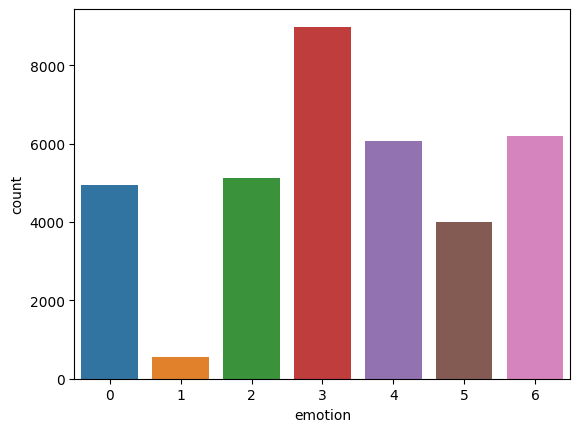

In [6]:
sns.countplot(x='emotion', data=mm)

In [7]:
mm['emotion'].value_counts()

3    8989
6    6198
4    6077
2    5121
0    4953
5    4002
1     547
Name: emotion, dtype: int64

where  0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral and also we have only 547 image for Disgust Dataset

<Axes: xlabel=' Usage', ylabel='count'>

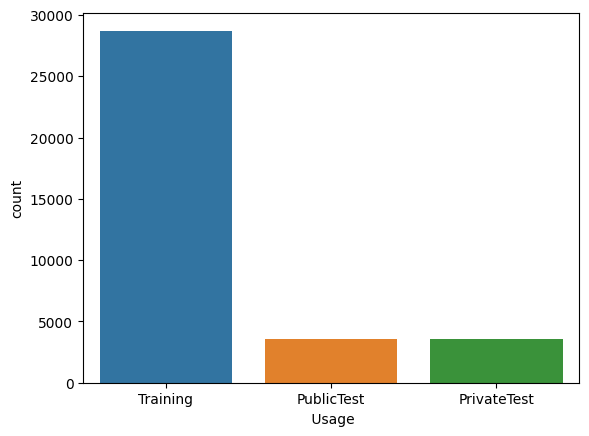

In [8]:
sns.countplot(x=' Usage', data=mm)

In [9]:
import cv2

In [13]:
pixels = mm[' pixels'].tolist()
width, height = 48, 48
faces = []

for pixel_sequence in pixels:
  face = [int(pixel) for pixel in pixel_sequence.split(' ')]
  face = np.asarray(face).reshape(width, height)
  face = cv2.resize(face.astype('uint8'),(48,48))
  faces.append(face.astype('float32'))

faces = np.asarray(faces)
faces = np.expand_dims(faces, -1)
emotions = pd.get_dummies(mm['emotion']).to_numpy()

In [14]:
x = faces.astype('float32')
x = x / 255.0
x = x - 0.5
x = x * 2.0
print(x.min(),x.max())
type(x)

-1.0 1.0


numpy.ndarray

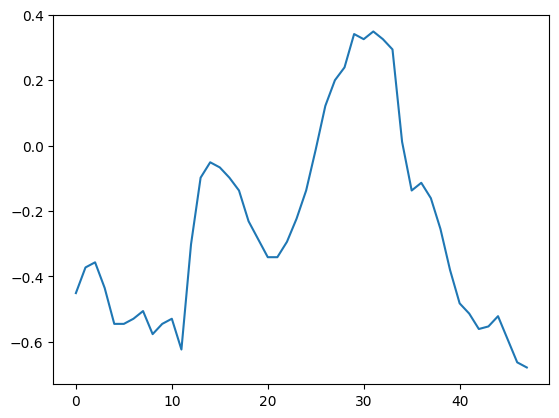

In [15]:
plt.plot(x[0,0])
plt.show()

In [16]:

train_x = x[:28709]
train_y = emotions[:28709]


val_x = x[28709:]
val_y = emotions[28709:]

train_data = (train_x, train_y)
val_data = (val_x, val_y)


In [17]:
print('Training Pixels',train_x.shape)  # ==> 4 dims -  no of images , width , height , color
print('Training labels',train_y.shape)

print('Validation Pixels',val_x.shape)
print('Validation labels',val_y.shape)

Training Pixels (28709, 48, 48, 1)
Training labels (28709, 7)
Validation Pixels (7178, 48, 48, 1)
Validation labels (7178, 7)


In [18]:
from keras.layers import Activation, Convolution2D, Dropout, Conv2D
from keras.layers import AveragePooling2D, BatchNormalization
from keras.layers import GlobalAveragePooling2D
from keras.models import Sequential
from keras.layers import Flatten
from keras.models import Model
from keras.layers import Input
from keras.layers import MaxPooling2D
from keras.layers import SeparableConv2D
from keras import layers
from keras.regularizers import l2

In [19]:
input_shape=(48, 48, 1)
num_classes = 7

In [20]:
model = Sequential()
model.add(Convolution2D(filters=16, kernel_size=(7, 7), padding='same',
                            name='image_array', input_shape=input_shape))
model.add(BatchNormalization())
model.add(Convolution2D(filters=16, kernel_size=(7, 7), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(AveragePooling2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(.5))

model.add(Convolution2D(filters=32, kernel_size=(5, 5), padding='same'))
model.add(BatchNormalization())
model.add(Convolution2D(filters=32, kernel_size=(5, 5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(AveragePooling2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(.5))

model.add(Convolution2D(filters=64, kernel_size=(3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Convolution2D(filters=64, kernel_size=(3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(AveragePooling2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(.5))

model.add(Convolution2D(filters=128, kernel_size=(3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Convolution2D(filters=128, kernel_size=(3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(AveragePooling2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(.5))

model.add(Convolution2D(filters=256, kernel_size=(3, 3), padding='same'))



model.add(BatchNormalization())
model.add(Convolution2D(filters=num_classes, kernel_size=(3, 3), padding='same'))
model.add(GlobalAveragePooling2D())
model.add(Activation('softmax',name='predictions'))

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 image_array (Conv2D)        (None, 48, 48, 16)        800       
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 16)       64        
 ormalization)                                                   
                                                                 
 conv2d (Conv2D)             (None, 48, 48, 16)        12560     
                                                                 
 batch_normalization_1 (Batc  (None, 48, 48, 16)       64        
 hNormalization)                                                 
                                                                 
 activation (Activation)     (None, 48, 48, 16)        0         
                                                                 
 average_pooling2d (AverageP  (None, 24, 24, 16)       0

In [22]:
batch_size = 32
num_epochs = 200
verbose = 1
num_classes = 7
patience = 50
base_path = 'drive/Colab Notebooks/emotion/simplecnn/'


In [23]:
from keras.callbacks import CSVLogger, ModelCheckpoint, EarlyStopping
from keras.callbacks import ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator

In [24]:
data_generator = ImageDataGenerator(
                        featurewise_center=False,
                        featurewise_std_normalization=False,
                        rotation_range=10,
                        width_shift_range=0.1,
                        height_shift_range=0.1,
                        zoom_range=.1,
                        horizontal_flip=True)

In [25]:
model.compile(optimizer='adam', loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 image_array (Conv2D)        (None, 48, 48, 16)        800       
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 16)       64        
 ormalization)                                                   
                                                                 
 conv2d (Conv2D)             (None, 48, 48, 16)        12560     
                                                                 
 batch_normalization_1 (Batc  (None, 48, 48, 16)       64        
 hNormalization)                                                 
                                                                 
 activation (Activation)     (None, 48, 48, 16)        0         
                                                                 
 average_pooling2d (AverageP  (None, 24, 24, 16)       0

In [26]:


datasets = ['icml_face_data']

num_epochs = 40
base_path="/content"
for dataset_name in datasets:
    print('Training dataset:', dataset_name)

    #callbacks
    log_file_path = dataset_name + '_emotion_training.log'

    csv_logger = CSVLogger(log_file_path, append=False)
    early_stop = EarlyStopping('val_loss', patience=patience)
    reduce_lr = ReduceLROnPlateau('val_loss', factor=0.1,patience=int(patience/4), verbose=1)

    trained_models_path = base_path + dataset_name + 'simple_cnn'
    model_names = trained_models_path + '.{epoch:02d}-{val_loss:.2f}.hdf5'
    model_checkpoint = ModelCheckpoint(model_names, 'val_loss', verbose=1,save_best_only=True)
    my_callbacks = [model_checkpoint, csv_logger, early_stop, reduce_lr]

    train_faces, train_emotions = train_data
    history=model.fit_generator(data_generator.flow(train_faces, train_emotions,
                                            batch_size),
                        epochs=num_epochs, verbose=1
                        ,callbacks=my_callbacks,validation_data =val_data)

Training dataset: icml_face_data


<ipython-input-26-4163ca27d124>:21: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=model.fit_generator(data_generator.flow(train_faces, train_emotions,


Epoch 1/40
896/898 [============================>.] - ETA: 0s - loss: 1.8272 - accuracy: 0.2581
Epoch 1: val_loss improved from inf to 1.68245, saving model to /contenticml_face_datasimple_cnn.01-1.68.hdf5
898/898 [==============================] - 44s 30ms/step - loss: 1.8272 - accuracy: 0.2578 - val_loss: 1.6825 - val_accuracy: 0.3314 - lr: 0.0010
Epoch 2/40
897/898 [============================>.] - ETA: 0s - loss: 1.6592 - accuracy: 0.3451
Epoch 2: val_loss improved from 1.68245 to 1.61749, saving model to /contenticml_face_datasimple_cnn.02-1.62.hdf5
898/898 [==============================] - 25s 28ms/step - loss: 1.6594 - accuracy: 0.3449 - val_loss: 1.6175 - val_accuracy: 0.3838 - lr: 0.0010
Epoch 3/40
898/898 [==============================] - ETA: 0s - loss: 1.5754 - accuracy: 0.3808
Epoch 3: val_loss improved from 1.61749 to 1.54709, saving model to /contenticml_face_datasimple_cnn.03-1.55.hdf5
898/898 [==============================] - 24s 26ms/step - loss: 1.5754 - accuracy

In [27]:
score = model.evaluate(val_x, val_y, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1]*100)

225/225 [==============================] - 1s 5ms/step - loss: 1.1175 - accuracy: 0.5687
Test loss: 1.1174803972244263
Test accuracy: 56.8682074546814


In [28]:
history_dict=history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])

In [29]:
print(history_dict["accuracy"])

[0.25782856345176697, 0.34487444162368774, 0.3807865083217621, 0.4078860282897949, 0.4208087921142578, 0.4373193085193634, 0.4483611285686493, 0.45933330059051514, 0.4679368734359741, 0.46741440892219543, 0.4733010530471802, 0.47922253608703613, 0.48131248354911804, 0.48503953218460083, 0.49144867062568665, 0.49162283539772034, 0.4969870150089264, 0.49632519483566284, 0.49594202637672424, 0.5047197937965393, 0.5043714642524719, 0.5079243183135986, 0.5116513967514038, 0.5054860711097717, 0.5114772319793701, 0.5144379734992981, 0.5110244154930115, 0.5148907899856567, 0.5160402655601501, 0.5160402655601501, 0.517677366733551, 0.5216830968856812, 0.518339216709137, 0.5185481905937195, 0.5215089321136475, 0.5243651866912842, 0.5245044827461243, 0.5273259282112122, 0.5254101753234863, 0.524678647518158]


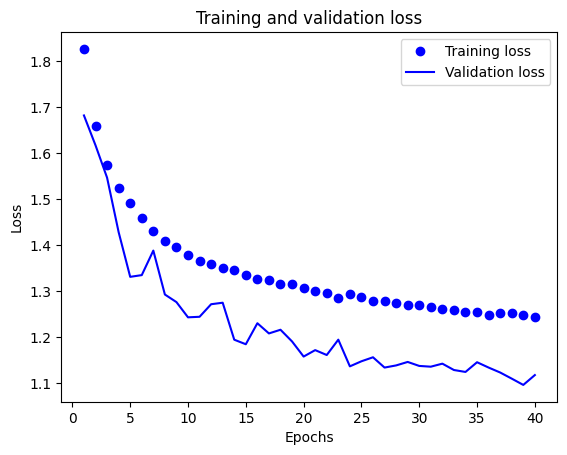

In [30]:
import matplotlib.pyplot as plt

train_loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, train_loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

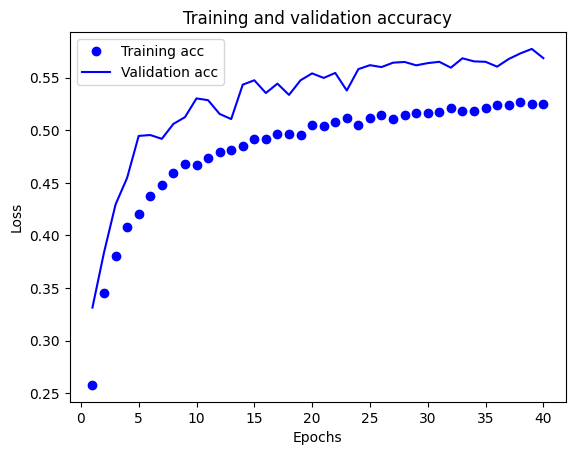

In [31]:
train_acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
plt.plot(epochs, train_acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [32]:
!pip install emoji --upgrade
import emoji


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 356.6/356.6 kB 12.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-2.6.0-py2.py3-none-any.whl size=351311 sha256=fcbe8fbf74546c6cc1f324e495841d528cc953ef824e7a987ae40e7f7df762ff
  Stored in directory: /root/.cache/pip/wheels/ea/0b/64/114bc939d0083621aa41521e21be246c888260b8aa21e6c1ad
Successfully built emoji


In [33]:
emotion_dict = {0: "Angry", 1: "Disgusted", 2: "Fearful", 3: "Happy", 4: "Sad", 5: "Surprised", 6: "Neutral"}

emojis = { 0:"\U0001f620",1:"\U0001f922" ,2:"\U0001f628" ,3:"\U0001f60A" , 4:"\U0001f625" ,5:"\U0001f632",6:"\U0001f641"}

In [34]:
print(emojis.values(),sep=" ")

dict_values(['😠', '🤢', '😨', '😊', '😥', '😲', '🙁'])


In [35]:
from google.colab.patches import cv2_imshow
import cv2
import numpy as np

def _predict(path):
  facecasc = cv2.CascadeClassifier('/content/drive/MyDrive/Facial-Emotion-Backend/image_processing_opencv.xml')
  imagePath = '/content/drive/MyDrive/Facial-Emotion-Backend/'+path
  image = cv2.imread(imagePath)
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  faces = facecasc.detectMultiScale(gray,scaleFactor=1.3, minNeighbors=10)
  print("No of faces : ",len(faces))
  i = 1
  for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)
    roi_gray = gray[y:y + h, x:x + w]
    cropped_img = np.expand_dims(np.expand_dims(cv2.resize(roi_gray, (48, 48)), -1), 0)
    prediction = model.predict(cropped_img)

    maxindex = int(np.argmax(prediction))
    print("person ",i," : ",emotion_dict[maxindex], "-->",emojis[maxindex])
    cv2.putText(image, emotion_dict[maxindex], (x+10, y-20), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2)

  cv2_imshow(image)

No of faces :  1
1/1 [==============================] - 1s 680ms/step
person  1  :  Angry --> 😠


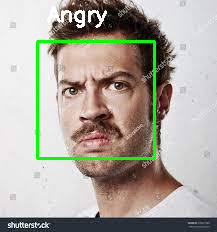

In [37]:
_predict('images/download.jpeg')

No of faces :  1
1/1 [==============================] - 0s 23ms/step
person  1  :  Fearful --> 😨


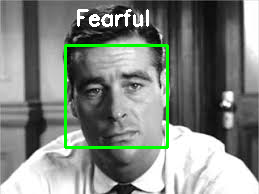

In [38]:
_predict('images/images (4).jpeg')

In [39]:
model.save_weights("model_weights.h5")

In [40]:
model.load_weights("model_weights.h5")

In [41]:
from keras.models import model_from_json

In [42]:
model_json = model.to_json()
with open("model_save.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
#model.save_weights("model.h5")
print("Saved model to disk")

# later...

# load json and create model
json_file = open('model_save.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
model = model_from_json(loaded_model_json)

model.load_weights("model_weights.h5")


Saved model to disk


In [43]:
from google.colab import files
files.download("model_weights.h5")
files.download("model_save.json")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>